---
Tom Curran

Problem Set \#5

MACS 30100

Monday February 19, 2018

---

**Splines and interpolation (4 points)**. A survey was conducted in the year 2019 in which a group of 20 American high school students ranked a representative sample of individuals according to coolness that could range from 0 to 100. The result was an aggregated score for each individual. They called this the Coolness Index. The data are in the comma-delimited data file CoolIndex.txt, where each row represents an individual in the sample (N = 956), the first col- umn is the age of the individual, and the second column is the corresponding aggregated Coolness Index value.1

In [81]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams
import statsmodels.api as sm

df = pd.read_csv("data/CoolIndex.txt", header = None)
df = df.rename(columns= {0:"age", 1:"cool_index"})
%matplotlib inline

In [82]:
df.head()

,age,cool_index
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


a) Create a scatterplot of the data with age on the x-axis and Coolness Index on the y-axis. Label your axes, and give the plot a title.

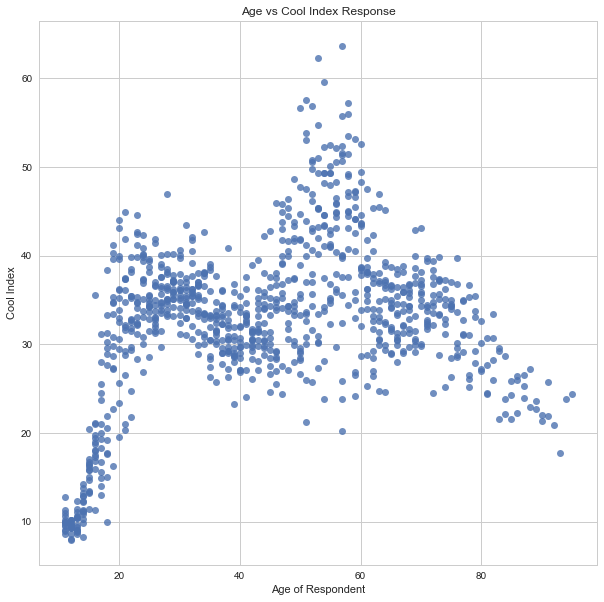

In [83]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.regplot(x = df.age,
            y = df.cool_index,
            fit_reg = False)
plt.title("Age vs Cool Index Response")
plt.ylabel("Cool Index")
plt.xlabel("Age of Respondent")
plot

***

b)Use ordinary least squares (OLS) regression to fit a stepwise function to these data. Use 5 bins [11, 22), [22, 40), [40, 59), [59, 77), [77, 95]. Remember that your dummy variables must be integer type (0, 1), not boolean type (True, False). Plot this step function on top of the scatterplot of the data from part (a). Label your axes, include a legend, and give the plot a title. Report your estimated step function values for each bin [β1, β2, β3, β4, β5]. What is the predicted coolness of a 73-year old from the stepwise function?

In [84]:
cool_index = df.cool_index
age = df.age

In [105]:
age1 = ((age >= 11) & (age < 22)).astype(int)
age2 = ((age >= 22) & (age < 40)).astype(int)
age3 = ((age >= 40) & (age < 59)).astype(int)
age4 = ((age >= 59) & (age < 77)).astype(int)
age5 = ((age >= 77) & (age <= 95)).astype(int)

In [106]:
step_df = pd.DataFrame({'age' : age,
                       'cool_index': cool_index, 
                       'age1':age1,
                       'age2':age2, 
                       'age3':age3,
                       'age4':age4,
                       'age5':age5})

age_steps = step_df[['age1', 'age2','age3','age4','age5',]]

step_df.describe()

,age,age1,age2,age3,age4,age5,cool_index
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,44.385983,0.162134,0.276151,0.285565,0.217573,0.058577,32.790118
std,20.250954,0.368767,0.447326,0.451919,0.412812,0.234955,9.246635
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.942515
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.219091
50%,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.721898
75%,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,37.453531
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.649347


In [151]:
reg = sm.OLS(endog = step_df.cool_index,
            exog = step_df[['age1', 'age2','age3','age4','age5',]],
            missing = 'drop').fit()

In [152]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             cool_index   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        08:34:49   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age1          20.1025      0.562     35.746      0.0

In [154]:
age_yhat = reg.predict(age_steps)


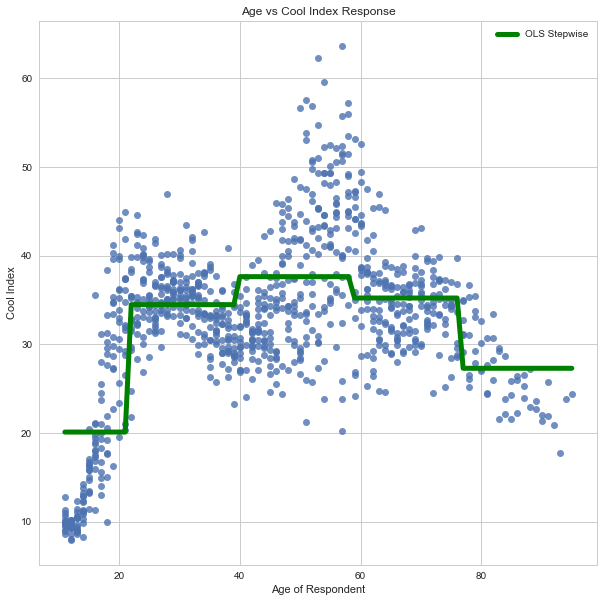

In [155]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.regplot(x = df.age,
            y = df.cool_index,
            fit_reg = False)
plt.plot(df.age, age_yhat, color = "g", linewidth = 5, label = "OLS Stepwise")
plt.title("Age vs Cool Index Response")
plt.ylabel("Cool Index")
plt.xlabel("Age of Respondent")
plt.legend()
plot

In [167]:
print("------------- Age Coefficients ------------- ")
[print("Beta",i,":",reg.params[i]) for i in range(0,5)]

------------- Age Coefficients ------------- 
Beta 0 : 20.1024572521
Beta 1 : 34.4757880776
Beta 2 : 37.6351054924
Beta 3 : 35.2254000402
Beta 4 : 27.2963782443


[None, None, None, None, None]

Since the coefficient on the age bin for people between 59 and 77 is 35.2254, a person who is 73 would have a predicted coolness of 35.2254.

***

c) Fit a linear spline (continuous)to the data over the 5 age bins from part(b). Use the scipy.interpolate.LQUnivariateSpline function with k = 1 (linear) and the knots equal to t =[22,40,59,77]. Plot your continuous linear spline against a scatterplot of the data from part (a) and the esti- mated step function from part (b). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the linear spline?

In [116]:
from scipy.interpolate import LSQUnivariateSpline

In [122]:
t = [22, 40, 59, 77]
k = 1

In [134]:
age = df.age.values
cool = df.cool_index.values

CI_spline = LSQUnivariateSpline(age, cool, t, k=1)

ci_spline_vals = CI_spline(df.age)


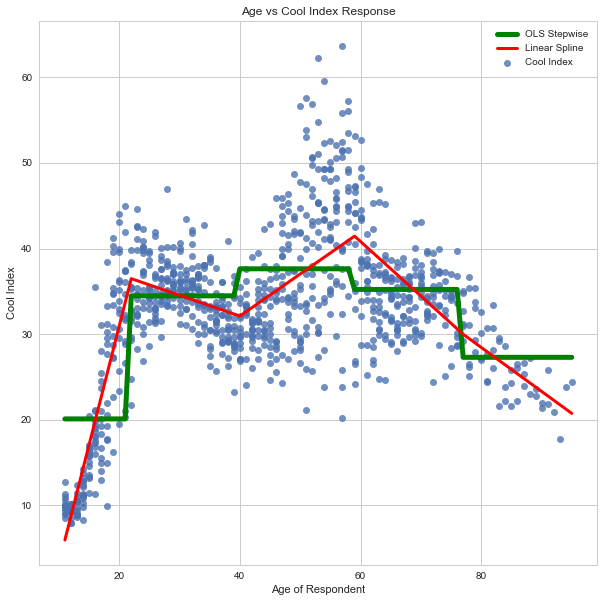

In [141]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.regplot(x = df.age,
            y = df.cool_index,
            fit_reg = False,
           label = "Cool Index")
plt.plot(df.age, age_yhat, color = "g", linewidth = 5, label = "OLS Stepwise")
plt.plot(df.age, ci_spline_vals, color = "r", linewidth = 3, label = "Linear Spline")
plt.title("Age vs Cool Index Response")
plt.ylabel("Cool Index")
plt.xlabel("Age of Respondent")
plt.legend()


In [142]:
print("The predicted coolness for a 73 year old using linear spline is {}".format(CI_spline(73)))

The predicted coolness for a 73 year old using linear spline is 32.536832389143306


In [136]:
cubic_spline = LSQUnivariateSpline(age, cool, t, k=3)

cubic_spline_vals = cubic_spline(df.age)


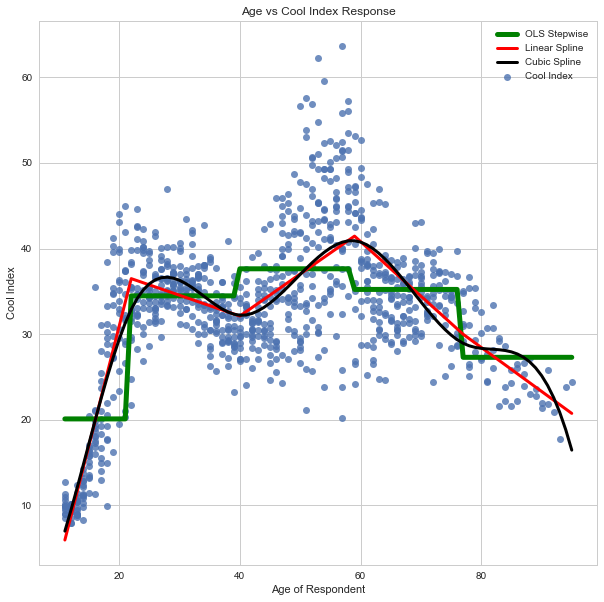

In [137]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.regplot(x = df.age,
            y = df.cool_index,
            fit_reg = False,
           label = "Cool Index")
plt.plot(df.age, age_yhat, color = "g", linewidth = 5, label = "OLS Stepwise")
plt.plot(df.age, ci_spline_vals, color = "r", linewidth = 3, label = "Linear Spline")
plt.plot(df.age, cubic_spline_vals, color = "black", linewidth = 3, label = "Cubic Spline")
plt.title("Age vs Cool Index Response")
plt.ylabel("Cool Index")
plt.xlabel("Age of Respondent")
plt.legend()

In [143]:
print("The predicted coolness for a 73 year old using cubic spline is {}".format(cubic_spline(73)))

The predicted coolness for a 73 year old using cubic spline is 31.262429389257864
